## 1) 이미지 Gradient

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

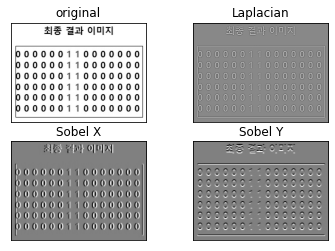

In [2]:
def grad():
    img = cv2.imread('images/Erosion_2.PNG', cv2.IMREAD_GRAYSCALE)
    
    laplacian = cv2.Laplacian(img, cv2.CV_64F) # 가로,세로선 합한선 검출
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3) # 세로선 검출 특화 (x방향으로 미분 수행)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3) # 가로선 검출 특화 (y방향으로 미분 수행)
    
    plt.subplot(2,2,1), plt.imshow(img, cmap='gray')
    plt.title('original'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(2,2,2), plt.imshow(laplacian, cmap='gray')
    plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(2,2,3), plt.imshow(sobelx, cmap='gray')
    plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(2,2,4), plt.imshow(sobely, cmap='gray')
    plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
    
    plt.show()
    
grad()

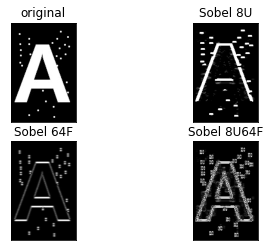

In [3]:
def grad():
    img = cv2.imread('images/opening.PNG', cv2.IMREAD_GRAYSCALE)
    
    sobelx8u = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=5)
    
    tmp = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    sobel64f = np.absolute(tmp)
    sobelx8u2 = np.uint8(sobel64f)
    
    plt.subplot(2,2,1), plt.imshow(img, cmap='gray')
    plt.title('original'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(2,2,2), plt.imshow(sobelx8u, cmap='gray')
    plt.title('Sobel 8U'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(2,2,3), plt.imshow(sobel64f, cmap='gray')
    plt.title('Sobel 64F'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(2,2,4), plt.imshow(sobelx8u2, cmap='gray')
    plt.title('Sobel 8U64F'), plt.xticks([]), plt.yticks([])
    
grad()

## 2) Canny Edge Detection

### 1단계 : 노이즈 제거
#### - 가우시안 필터 적용
### 2단계 : Gradient 값이 높은 부분 찾기
![image](images/Canny_1.PNG)
#### - edge에 수직인 방향의 Gradient 찾기
### 3단계 : 최대값이 아닌 픽셀의 값을 0으로 만들기
![image](images/Canny_2.PNG)
#### - A지점에서 gradient 값이 B, C보다 큰지 확인 후 크면 넘어가고 작으면 0으로 계산
### 4단계 : Hyteresis Thresholding
![image](images/Canny_3.PNG)
#### - maxVal보다 높으면 확실히 edge, minVal보다 낮으면 확실히 edge 아님, 중간에 위치한 값은 연결성에 따라 결정

In [4]:
def canny():
    img = cv2.imread('images/movie_image1.jpg', cv2.IMREAD_GRAYSCALE)
    
    edge1 = cv2.Canny(img, 50, 200)
    edge2 = cv2.Canny(img, 100, 200)
    edge3 = cv2.Canny(img, 170, 200)
    
    cv2.imshow('original', img)
    cv2.imshow('Canny Edge1', edge1)
    cv2.imshow('Canny Edge2', edge2)
    cv2.imshow('Canny Edge3', edge3)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
canny()